# Mushroom Cultivation Analysis
Alessio Carnevale, Manuel Cattoni

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
from scipy import stats

In [3]:
x = np.array([2, 8, 15, 25])    # Storage temperatures
n = np.array([30, 25, 20, 30])  # Total mushrooms
y = np.array([2, 4, 5, 20])     # Spoiled mushrooms

The **likelihood** is:

$$
L(\alpha, \beta)
= \prod_{i=1}^n 
\binom{n_i}{y_i}\,
p_i^{\,y_i}\,
(1 - p_i)^{\,n_i - y_i},
$$

where

$$
p_i = \frac{1}{1 + e^{-(\alpha + \beta x_i)}}.
$$


The **log-likelihood** used in the code is

$$
\ell(\alpha, \beta)
= \sum_{i=1}^N 
\log\!\Bigg[
\binom{n_i}{y_i}\,
p_i^{\,y_i}\,
(1 - p_i)^{\,n_i - y_i}
\Bigg],
$$

In [ ]:
def lik(theta):
    alpha, beta = theta
    
    p = 1 / (1 + np.exp(-(alpha + beta * x)))

    l = np.prod([
        comb(n[i], y[i]) * p[i]**y[i] * (1 - p[i])**(n[i] - y[i])
        for i in range(len(n))
    ])
    return l


def log_lik(theta):
    alpha, beta = theta

    p = 1 / (1 + np.exp(-(alpha + beta * x)))

    ll = np.sum(stats.binom.logpmf(y, n, p))
    
    return ll


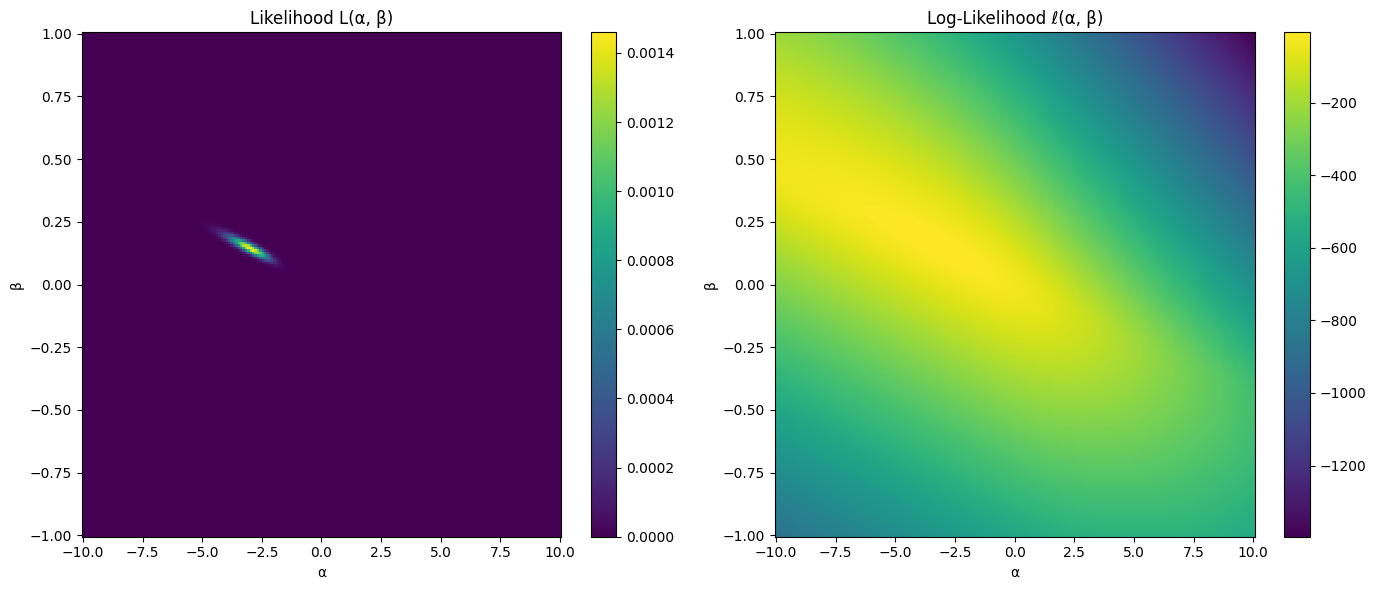

In [5]:
theta = np.array([0.1, 0.05])

# Grid ranges
alpha_vals = np.linspace(-10, 10, 200)
beta_vals = np.linspace(-1, 1, 200)

A, B = np.meshgrid(alpha_vals, beta_vals)

L = np.zeros_like(A)
LL = np.zeros_like(A)

# Compute likelihoods 
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        theta = (A[i, j], B[i, j])
        L[i, j] = lik(theta)
        LL[i, j] = log_lik(theta)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pc1 = axes[0].pcolormesh(A, B, L, shading='auto')
axes[0].set_title("Likelihood L(α, β)")
axes[0].set_xlabel("α")
axes[0].set_ylabel("β")
fig.colorbar(pc1, ax=axes[0])

pc2 = axes[1].pcolormesh(A, B, LL, shading='auto')
axes[1].set_title("Log-Likelihood ℓ(α, β)")
axes[1].set_xlabel("α")
axes[1].set_ylabel("β")
fig.colorbar(pc2, ax=axes[1])

plt.tight_layout()
plt.show()


The likelihood function produces extremely small values. The surface is essentially zero everywhere beside a tiny area.

The log-likelihood however shows a smooth, continuous gradient spreading across the entire parameter space, clearly representing the geometry of this optimization problem. The logarithm brings the values into a manageable numerical range.

### Maximum Likelihood
minimizing the negative log-likelihood because it avoids issues that can arise when working with very small likelihood values

In [6]:
from scipy.optimize import minimize

# Define the negative log-likelihood function
def neg_log_lik(theta):
    return -log_lik(theta)

# Initial guess for alpha and beta (based on the plots or prior knowledge)
initial_guess = [0.1, 0.05]

# Perform the optimization
result = minimize(neg_log_lik, initial_guess, method='BFGS')

# Extract the ML estimates
alpha_ml, beta_ml = result.x

print(f"Maximum Likelihood Estimates: α_ML = {alpha_ml:.4f}, β_ML = {beta_ml:.4f}")

Maximum Likelihood Estimates: α_ML = -2.9776, β_ML = 0.1439


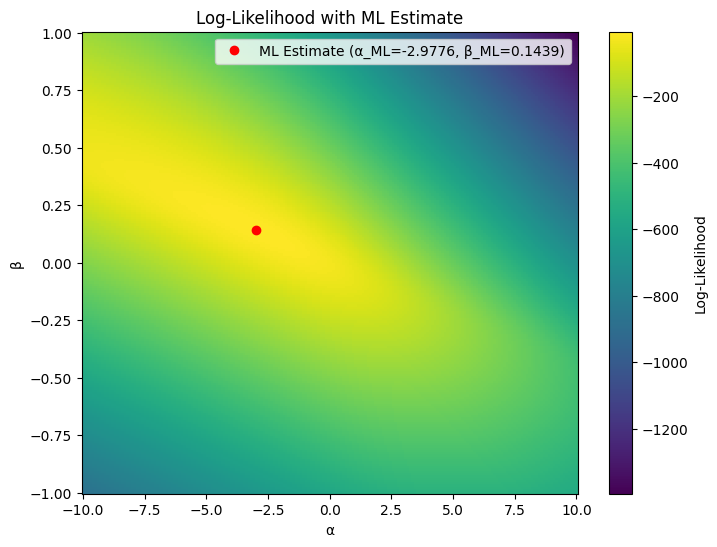

In [7]:
# Plot the likelihood function with the ML estimate using pcolormesh
fig, ax = plt.subplots(figsize=(8, 6))

# pcolormesh plot of the log-likelihood
pc = ax.pcolormesh(A, B, LL, shading='auto', cmap="viridis")
ax.set_title("Log-Likelihood with ML Estimate")
ax.set_xlabel("α")
ax.set_ylabel("β")
fig.colorbar(pc, ax=ax, label="Log-Likelihood")

# Overlay the ML estimate
ax.plot(alpha_ml, beta_ml, 'ro', label=f"ML Estimate (α_ML={alpha_ml:.4f}, β_ML={beta_ml:.4f})")
ax.legend()

plt.show()